In [1]:
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import numpy as np

Bizler internette bir web sitesine bağlanıp belirli alanlara tıklayarak geziniyor, bazı formlar dolduruyor veya butonlara tıklayarak bazı yeni ekranların karşımıza gelmesini bekliyoruz. İşte **Selenium**, bilgisayarımıza yükleyeceğiniz bir driver yardımıyla ekrana bir tarayıcı açarak, gerçek bir insan gibi istediğimiz işlemleri çalıştırmanızı sağlayan bir araçtır. 


## Kütüphane Yükleme

```python
- !pip install selenium
```

## WebDriver Yükleme

Selenium kütüphanesini kullabilmek için bilgisayarlarımıza bir webdriver yüklememiz gerekiyor. Eğer imkanımız varsa **ChromeDriver** bizim için en iyi seçenek olacaktır ancak diğer tarayıcıların driverlarını da kullanabiliriz. Yükleme adımları için aşağıdaki yönergeyi takip edebilirsiniz:

1. Kullandığınız tarayıcınızın versiyonunu öğrenin. (Chrome > About Google Chrome)
2. [Linkteki](https://chromedriver.chromium.org/downloads) adrese giderek tarayıcınızın versiyonuyla uyumlu olan ChromeDriver'ı indirin.
3. İşletim sisteminizle uyumlu olan Driverı indirdikten sonra indirdiğiniz **chromedriver.exe** dosyasını Zip'ten çıkarıp uygun gördüğünüz bir dizine kopyalayın.

In [4]:
from selenium import webdriver
import warnings
import os
warnings.filterwarnings(action='ignore')

# Bilgisayarımızda chromedriver.exe dosyasını kaydettiğimiz dizin
chromedriver = "/Users/ataozarslan/Documents/chromedriver-mac-arm64/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

In [5]:
driver = webdriver.Chrome(chromedriver)
driver.get("https://www.zingat.com/istanbul-satilik-daire")

<html lang="tr"><head>
<script async="" src="https://cdn.infoset.app/chat/icw.js" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/470439163125270?v=2.9.135&amp;r=stable&amp;domain=www.zingat.com"></script><script async="" src="//connect.facebook.net/en_US/fbevents.js"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://tags.creativecdn.com/eZV4KaNBADt7GZMM7WTu.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-QFTL48L4DJ&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-PFX9DBW"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-TWBKCZ"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-PFX9DBW"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=G
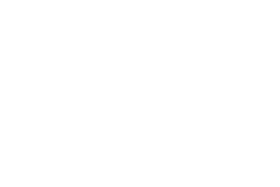
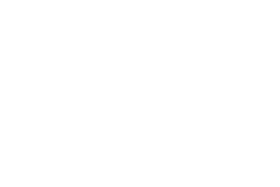
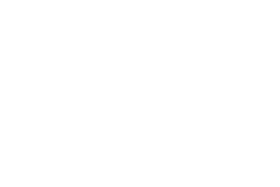
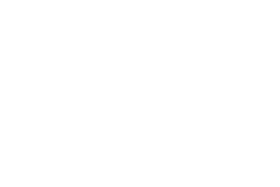
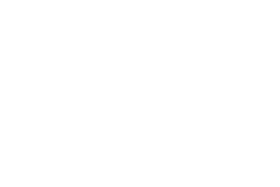
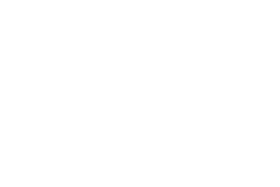
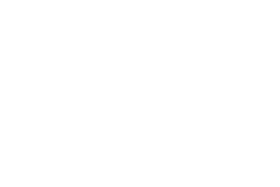
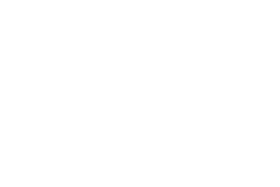
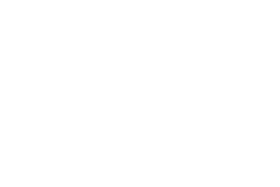
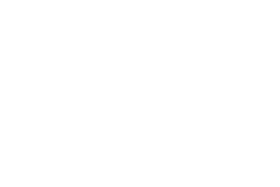
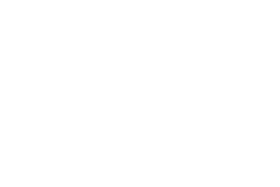
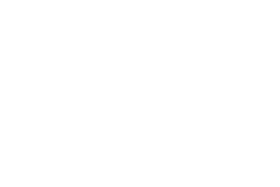
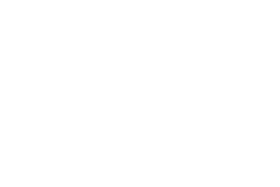
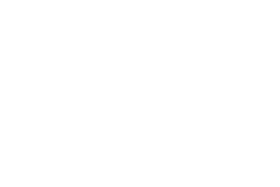
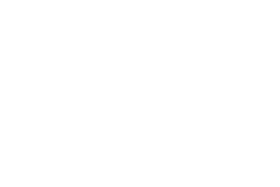
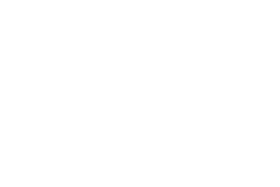
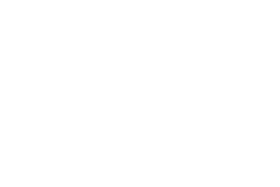
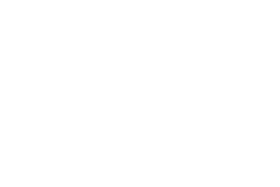
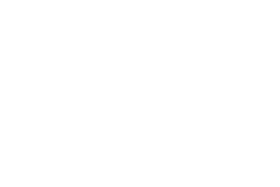
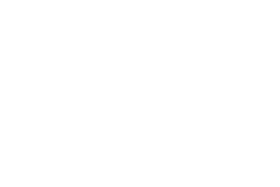
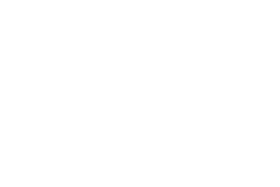
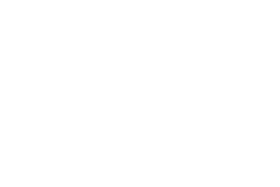
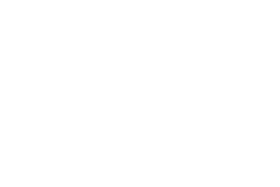
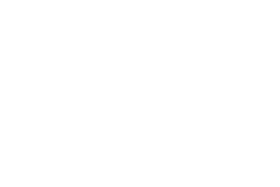
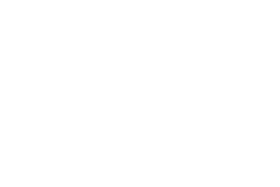
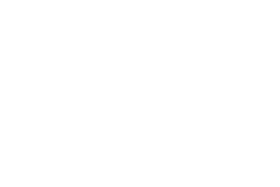
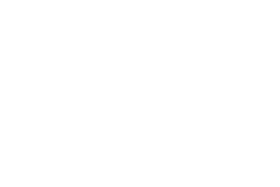
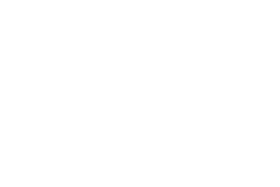
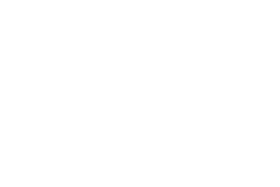
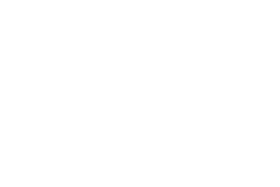
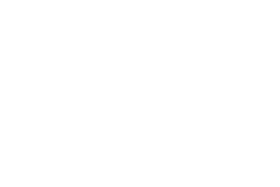
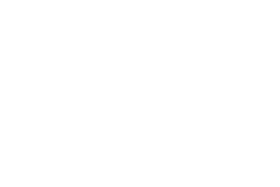
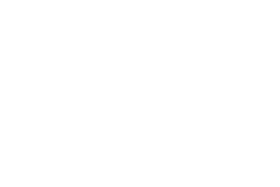
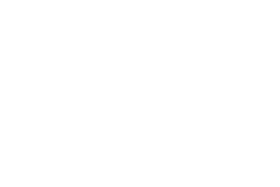
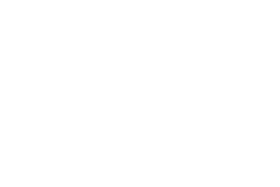
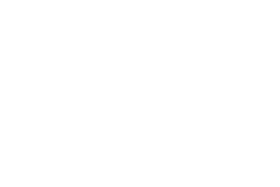
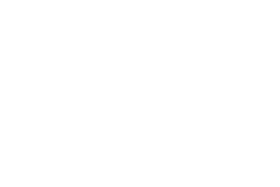
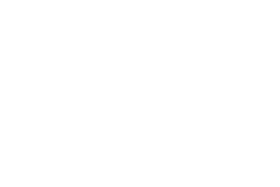
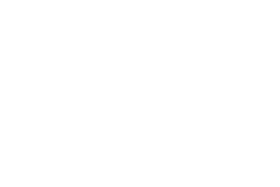
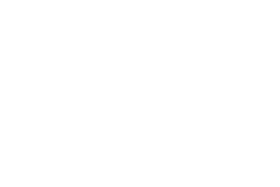
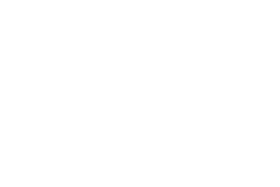
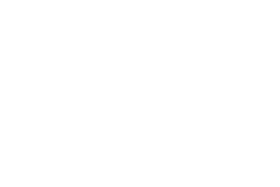
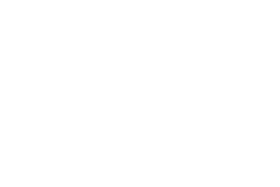
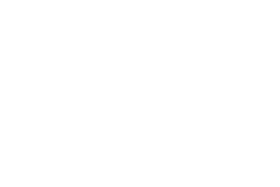
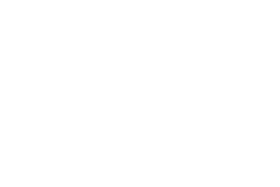
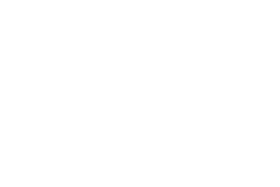
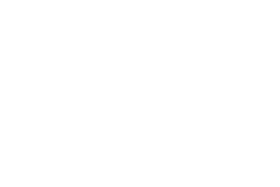
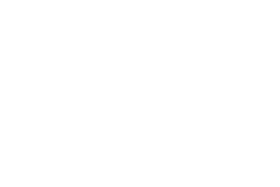
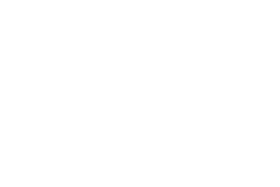
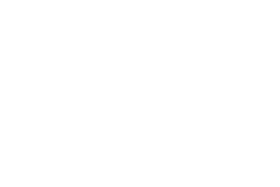
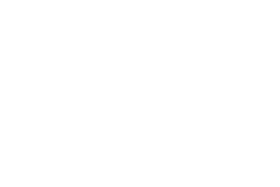
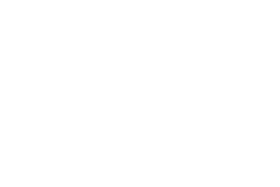
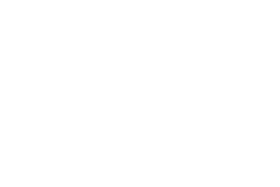
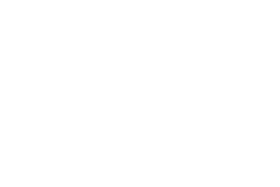
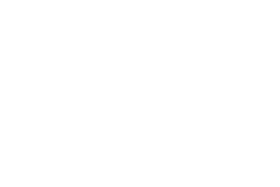
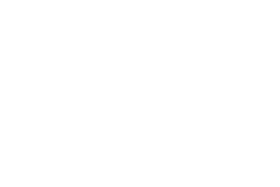
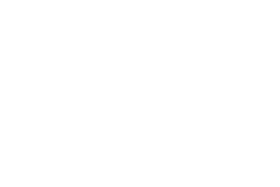
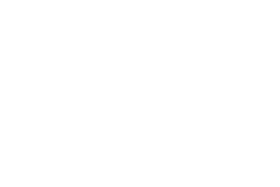
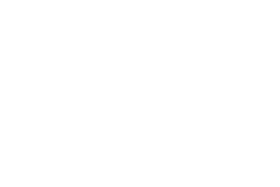
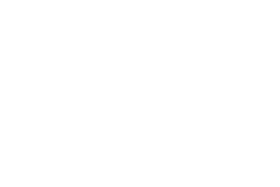
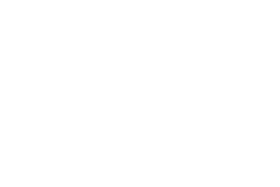
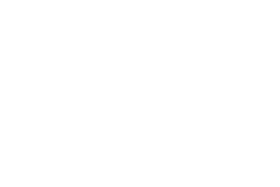
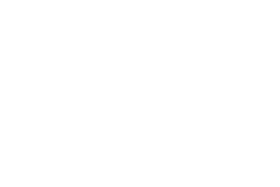
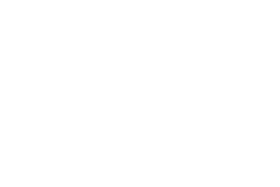
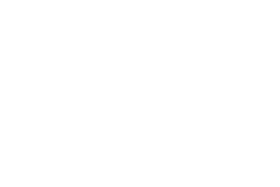
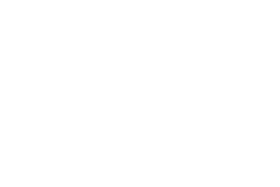
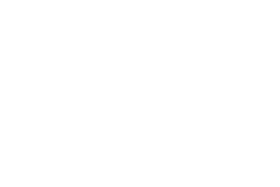
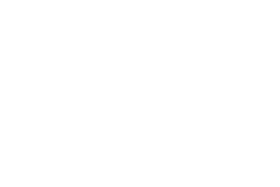
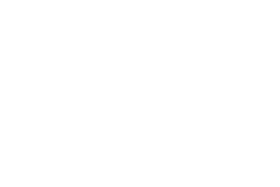
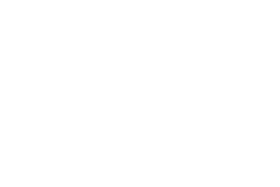
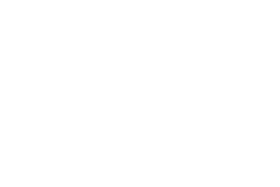
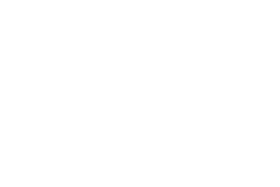
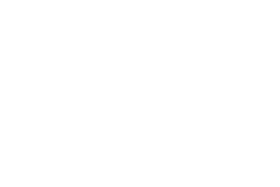
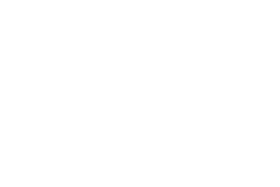
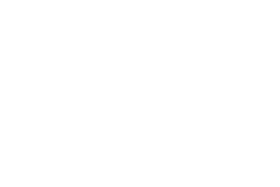
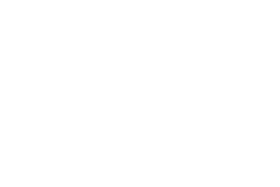
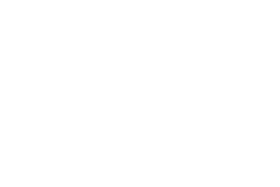
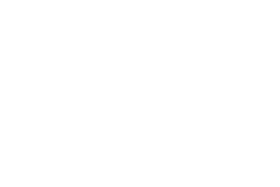
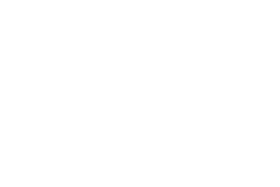
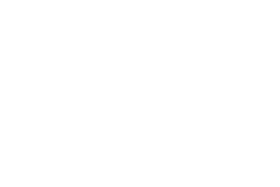
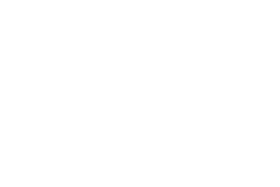
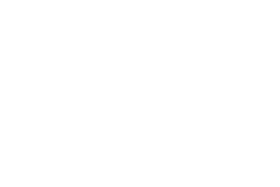
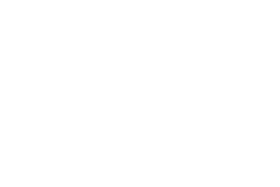
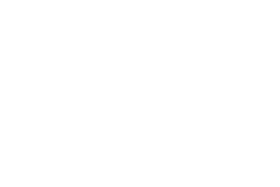
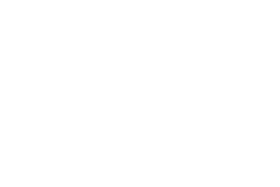
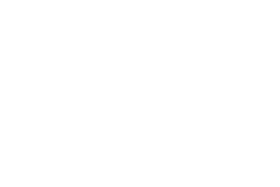
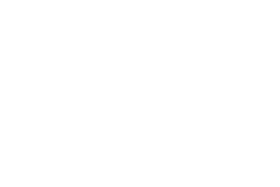
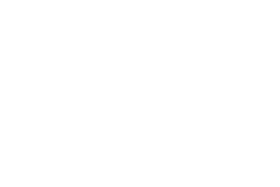
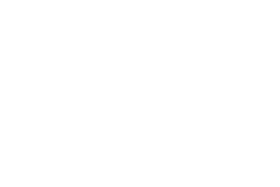
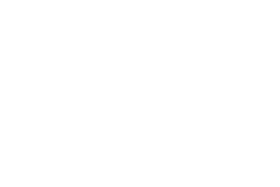
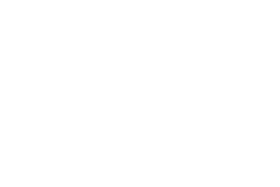

In [4]:
soup = bts(driver.page_source, "html.parser")
soup

In [5]:
"https://www.zingat.com" + soup.find("a", {"class":"zl-card-inner"}).get("href")

'https://www.zingat.com/esenyurt-beykent-metrobuse-cok-yakin-acil-satilik-1-0-daire-4943042i'

In [6]:
driver.close()

In [7]:
pages = ["https://www.zingat.com/istanbul-satilik-daire"]
for page in range(2,11):
    pages.append("https://www.zingat.com/istanbul-satilik-daire?page=" + str(page))
    
pages

['https://www.zingat.com/istanbul-satilik-daire',
 'https://www.zingat.com/istanbul-satilik-daire?page=2',
 'https://www.zingat.com/istanbul-satilik-daire?page=3',
 'https://www.zingat.com/istanbul-satilik-daire?page=4',
 'https://www.zingat.com/istanbul-satilik-daire?page=5',
 'https://www.zingat.com/istanbul-satilik-daire?page=6',
 'https://www.zingat.com/istanbul-satilik-daire?page=7',
 'https://www.zingat.com/istanbul-satilik-daire?page=8',
 'https://www.zingat.com/istanbul-satilik-daire?page=9',
 'https://www.zingat.com/istanbul-satilik-daire?page=10']

In [8]:
links = []

for page in pages:
    driver = webdriver.Chrome(chromedriver)
    driver.get(page)
    html = bts(driver.page_source, "html.parser")
    for sonuc in html.findAll("a",{"class":"zl-card-inner"}):
        links.append("https://www.zingat.com" + sonuc.get("href"))

links

['https://www.zingat.com/esenyurt-beykent-metrobuse-cok-yakin-acil-satilik-1-0-daire-4943042i',
 'https://www.zingat.com/sancaktepe-mevlanada-iki-aileye-uygun-4-1-cati-dubleks-4758961i',
 'https://www.zingat.com/sancaktepe-osmangazi-3-2-2-aileye-uygun-168-metre-cati-dubleks-4911752i',
 'https://www.zingat.com/sancaktepe-safada-satilik-daire-cati-dubleks-4891552i',
 'https://www.zingat.com/sancaktepe-mervede-satilik-daire-4863093i',
 'https://www.zingat.com/beylikduzu-3-1-butik-site-ici-bahce-kullanimli-satilik-daire-4902033i',
 'https://www.zingat.com/buyukcekmece-luks-site-ici-1-1-satilik-daire-4889061i',
 'https://www.zingat.com/beylikduzu-kavakli-arakat-2-1-satilik-daire-4924183i',
 'https://www.zingat.com/buyukcekmece-e5-e-2-dk-mesafe-acil-satilik-dubleks-daire-4926170i',
 'https://www.zingat.com/buyukcekmece-3-1-sahile-yakin-satilik-daire-4927151i',
 'https://www.zingat.com/bahcesehir-yeni-evim-projesine-uygun-oturuma-hazir-luks-2-1daire-4721049i',
 'https://www.zingat.com/esenyur

In [9]:
len(links)

210

In [35]:
driver.close()

<html lang="tr"><head>
<script src="/cdn-cgi/apps/head/x1Xp7i1b0NfjYso73lc3_rljQ7Y.js"></script><script type="text/javascript">window.isMobile = /Mobile|iP(hone|od|ad)|Android|BlackBerry|IEMobile/.test(navigator.userAgent);
  window.matchMobile = window.matchMedia('(max-width: 991px)').matches;
  window.tablet = window.matchMedia('(min-width:992px) and (max-width: 1200px)').matches;

</script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, minimal-ui, initial-scale=1, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.zingat.com/esenyurt-beykent-metrobuse-cok-yakin-acil-satilik-1-0-daire-4943042i" rel="canonical"/>
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="knl5mzi7n3xgz1a271qsq7ut2upmno" name="facebook-domain-verification"/><title>ESENYURT BEYKENT METROBÜSE ÇOK YAKIN ACİL SATILIK 1+0 DAİRE #4943042</title
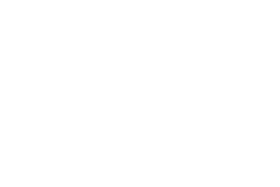
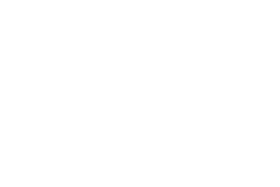
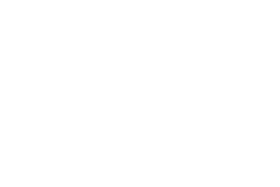
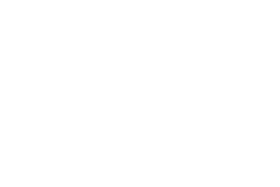
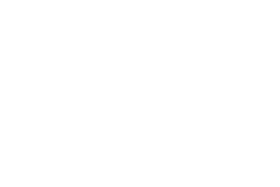
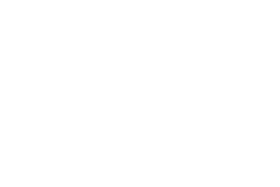
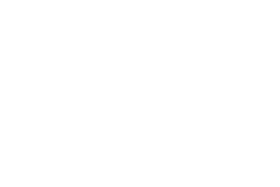
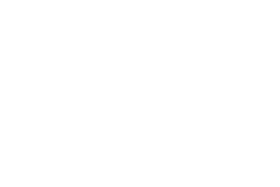
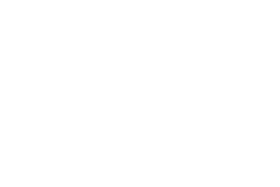
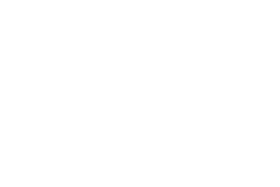
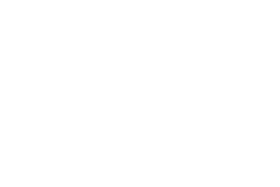
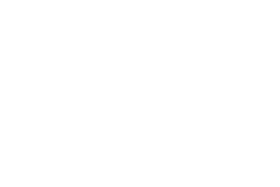
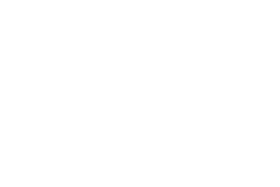
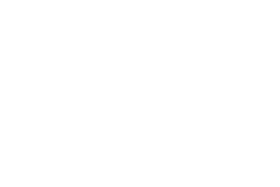
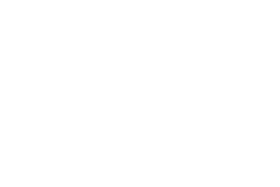
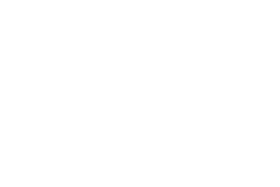
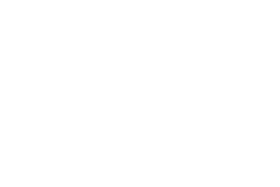
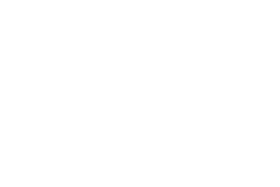
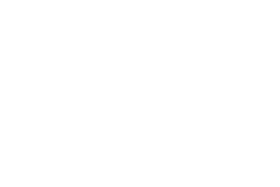
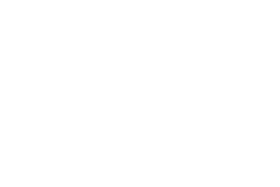
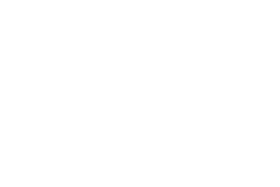
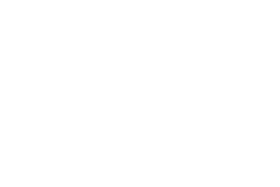
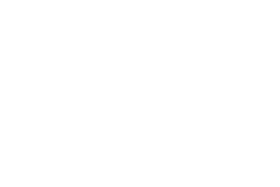
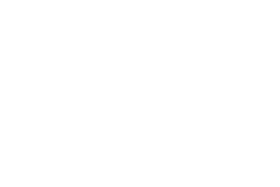
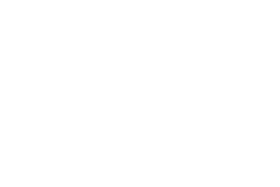
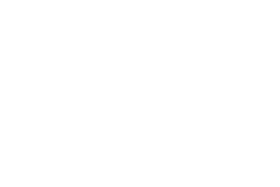
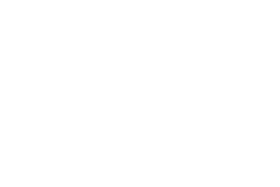

In [12]:
driver = webdriver.Chrome(chromedriver)
driver.get("https://www.zingat.com/esenyurt-beykent-metrobuse-cok-yakin-acil-satilik-1-0-daire-4943042i")
html = bts(driver.page_source, "html.parser")

In [34]:
html.find("h2").text.split(",")[0].strip()

'Gökevler'

In [36]:
result = []
for sonuc in links[:10]:
    driver = webdriver.Chrome(chromedriver)
    driver.get(sonuc)
    html = bts(driver.page_source, "html.parser")
    
    try:
        ilan_ismi = html.find("div", {"class":"col-md-9"}).h1.text
    except:
        ilan_ismi = np.nan
    try:
        mahalle = html.find("div", {"class":"detail-location-path"}).h2.text.split(",")[0].strip()
    except:
        mahalle = np.nan
    try:
        ilce = html.find("div", {"class":"detail-location-path"}).h2.text.split(",")[1].strip()
    except:
        ilce = np.nan
    try:
        il = html.find("div", {"class":"detail-location-path"}).h2.text.split(",")[2].strip()
    except:
        il = np.nan
    try:
        fiyat = html.find("div", {"class":"col-md-3 price-info-text"}).find("strong",{"itemprop":"price"}).text.replace("TL","").replace(".","").strip()
    except:
        fiyat = np.nan
    try:
        fotograf = html.find("div", {"class":"detail-images-slide-container hidden-xs hidden-sm"}).a.span.text.replace("+","")
    except:
        fotograf = np.nan
    try:
        net_m2 = html.find("ul", {"class":"row attribute-detail-list"}).find(text=re.compile("Net m²")).findNext().text.replace("m²","").strip()
    except:
        net_m2 = np.nan
    try:
        brüt_m2 = html.find("ul", {"class":"row attribute-detail-list"}).find(text=re.compile("Brüt m²")).findNext().text.replace("m²","").strip()
    except:
        brüt_m2 = np.nan
    try:
        oda_salon = html.find("ul", {"class":"row attribute-detail-list"}).find(text=re.compile("Oda Sayısı")).findNext().text.strip()
    except:
        oda_salon = np.nan
    try:
        oda = html.find("ul", {"class":"row attribute-detail-list"}).find(text=re.compile("Oda Sayısı")).findNext().text.strip()[0]
    except:
        oda = np.nan
    try:
        salon = html.find("ul", {"class":"row attribute-detail-list"}).find(text=re.compile("Oda Sayısı")).findNext().text.strip()[2]
    except:
        salon = np.nan
    try:
        banyo = html.find("ul", {"class":"row attribute-detail-list"}).find(text=re.compile("Banyo Sayısı")).findNext().text.strip()
    except:
        banyo = np.nan
    try:
        kat_sayısı = html.find("ul",{"class":"row attribute-detail-list"}).find(text=re.compile("Binadaki Kat Sayısı")).findNext().text.strip()
    except:
        kat_sayısı = np.nan
    try:
        kat = html.find("ul",{"class":"row attribute-detail-list"}).find(text=re.compile("Bulunduğu Kat")).findNext().text.strip()
    except:
        kat = np.nan
    try:
        yapı_durumu = html.find("ul",{"class":"row attribute-detail-list"}).find(text=re.compile("Yapının Durumu")).findNext().text.strip()
    except:
        yapı_durumu = np.nan
    try:
        ısıtma = html.find("ul",{"class":"row attribute-detail-list"}).find(text=re.compile("Isıtma Tipi")).findNext().text.strip()
    except:
        ısıtma = np.nan
    try:
        bina_yası = html.find("ul",{"class":"row attribute-detail-list"}).find(text=re.compile("Bina Yaşı")).findNext().text.strip()
    except:
        bina_yası = np.nan
    try:
        aidat = html.find("ul",{"class":"row attribute-detail-list"}).find(text=re.compile("Aidat")).findNext().text.replace("TL","").replace("(aylık)","").strip()
    except:
        aidat = np.nan
    try:
        kira = html.find("ul",{"class":"row attribute-detail-list"}).find(text=re.compile("Kira Getirisi")).findNext().text.replace("TL","").replace("(aylık)","").strip()
    except:
        kira = np.nan
    
    result.append([ilan_ismi,mahalle,ilce,il,fiyat,net_m2,brüt_m2,oda_salon,oda,salon,banyo,fotograf,kat_sayısı,kat,yapı_durumu,ısıtma,bina_yası,aidat,kira])
    
columns = ["İLAN ADI","MAHALLE","İL","İLÇE","FİYAT","NET(m²)","BRÜT(m²)","ODA-SALON SAYISI","ODA SAYISI","SALON SAYISI","BANYO SAYISI","FOTOĞRAF SAYISI","BİNA KAT SAYISI","BULUNDUĞU KAT","YAPI DURUMU","ISITMA","BİNA YAŞI","AİDAT","KİRA GETİRİSİ"]
df = pd.DataFrame.from_records(result, columns=columns)

In [37]:
df

,İLAN ADI,MAHALLE,İL,İLÇE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,BİNA KAT SAYISI,BULUNDUĞU KAT,YAPI DURUMU,ISITMA,BİNA YAŞI,AİDAT,KİRA GETİRİSİ
0,ESENYURT BEYKENT METROBÜSE ÇOK YAKIN ACİL SATI...,Gökevler,Esenyurt,İstanbul,845000,40,48,1+0 (Stüdyo),1,0,1,6,10-20 arası,4,Sıfır,Merkezi Sistem (Isı Payı Ölçer),6-10 arası,0,0
1,Sancaktepe Mevlana'da iki aileye uygun 4+1 çat...,Mevlana,Sancaktepe,İstanbul,2750000,155,178,4+1,4,1,2,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sancaktepe Osmangazi 3+2 2 aileye uygun 168 me...,Osmangazi,Sancaktepe,İstanbul,2425000,168,178,3+2,3,2,2,19,4,NaN,İkinci El,Kombi (Doğalgaz),11-15 arası,NaN,17.000
3,Sancaktepe Safa'da Satılık Daire çatı dubleks,Safa,Sancaktepe,İstanbul,4550000,150,168,4+1,4,1,2,10,4,3,İkinci El,Kombi (Doğalgaz),5,NaN,15.000
4,Sancaktepe yunus emrede satılık daire,Yunus Emre,Sancaktepe,İstanbul,2750000,150,168,4+1,4,1,3,6,1,Yüksek Giriş,İkinci El,Kombi (Doğalgaz),1,0,NaN
5,BEYLİKDÜZÜ 3+1 BUTİK SİTE İÇİ BAHÇE KULLANIMLI...,Dereağzı,Beylikdüzü,İstanbul,3950000,125,140,3+1,3,1,2,14,5,1,Sıfır,Kombi (Doğalgaz),0,0,0
6,BÜYÜKÇEKMECE LÜKS SİTE İÇİ 1+1 SATILIK DAİRE,Pınartepe,Büyükçekmece,İstanbul,3200000,70,85,1+1,1,1,1,22,10-20 arası,6,Sıfır,Kombi (Doğalgaz),6-10 arası,0,0
7,BEYLİKDÜZÜ KAVAKLI ARAKAT 2+1 SATILIK DAİRE,Kavaklı,Beylikdüzü,İstanbul,2350000,95,110,2+1,2,1,2,22,5,1,Sıfır,Kombi (Doğalgaz),6-10 arası,0,0
8,BÜYÜKÇEKMECE E5 E 2 DK MESAFE ACİL SATILIK DUB...,Murat Çeşme,Büyükçekmece,İstanbul,3390000,150,170,3+2,3,2,2,11,4,4,Sıfır,Kombi (Doğalgaz),6-10 arası,0,0
9,BÜYÜKÇEKMECE 3+1 SAHİLE YAKIN SATILIK DAİRE,Gürpınar,Beylikdüzü,İstanbul,3200000,140,155,3+1,3,1,2,11,5,3,Sıfır,Kombi (Doğalgaz),6-10 arası,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          10 non-null     object
 1   MAHALLE           10 non-null     object
 2   İL                10 non-null     object
 3   İLÇE              10 non-null     object
 4   FİYAT             10 non-null     object
 5   NET(m²)           10 non-null     object
 6   BRÜT(m²)          10 non-null     object
 7   ODA-SALON SAYISI  10 non-null     object
 8   ODA SAYISI        10 non-null     object
 9   SALON SAYISI      10 non-null     object
 10  BANYO SAYISI      10 non-null     object
 11  FOTOĞRAF SAYISI   10 non-null     object
 12  BİNA KAT SAYISI   9 non-null      object
 13  BULUNDUĞU KAT     8 non-null      object
 14  YAPI DURUMU       9 non-null      object
 15  ISITMA            9 non-null      object
 16  BİNA YAŞI         9 non-null      object
 17  AİDAT             7

In [40]:
df.to_csv('istanbul_satilik_daire.csv')

In [39]:
driver.close()